<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 7 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


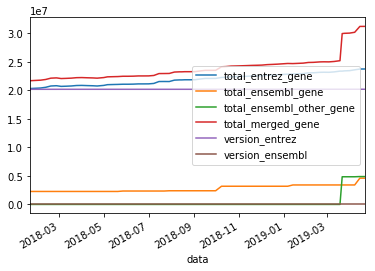

In [1]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("totals.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
df.version_ensembl_other.replace('None', 0, inplace=True)
df.info()
df.head()
df.plot()
#df

In [2]:
#df = df.asfreq("1d",method="bfill")
df.info()
df



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-01-21 to 2019-04-21
Data columns (total 7 columns):
total_entrez_gene           66 non-null int64
total_ensembl_gene          66 non-null int64
total_ensembl_other_gene    66 non-null int64
total_merged_gene           66 non-null int64
version_entrez              66 non-null int64
version_ensembl             66 non-null int64
version_ensembl_other       66 non-null object
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


,total_entrez_gene,total_ensembl_gene,total_ensembl_other_gene,total_merged_gene,version_entrez,version_ensembl,version_ensembl_other
data,,,,,,,
2018-01-21,20313133,2273596,0,21686111,20180120,91,0
2018-02-04,20404516,2273596,0,21777526,20180203,91,0
2018-02-11,20527819,2273596,0,21900829,20180210,91,0
2018-02-18,20757784,2273596,0,22130811,20180217,91,0
2018-02-25,20802734,2273596,0,22175758,20180224,91,0
2018-02-26,20802734,2273596,0,22175758,20180224,91,0
2018-03-04,20692425,2273596,0,22065464,20180303,91,0
2018-03-11,20723651,2273596,0,22096690,20180309,91,0
2018-03-18,20763367,2273596,0,22136437,20180316,91,0


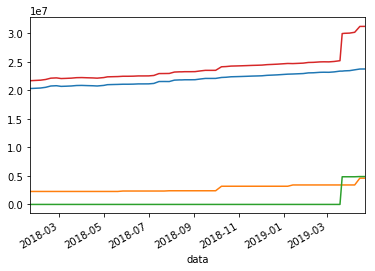

In [3]:
%matplotlib inline
df.total_entrez_gene.plot()
df.total_ensembl_gene.plot()
df.total_ensembl_other_gene.plot()
df.total_merged_gene.plot()

## Up until big step

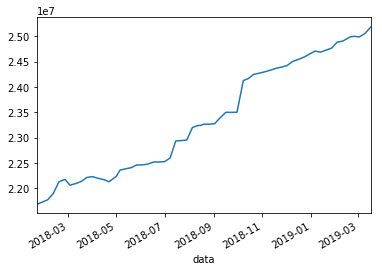

In [4]:
# up until big step
df.total_merged_gene[:-6].plot()
dfalmoststable = df[:-6]

adf: 0.10687849909200815
critical_values: {'5%': -2.911939409384601, '1%': -3.5463945337644063, '10%': -2.5936515282964665}


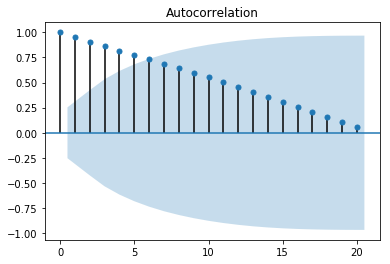

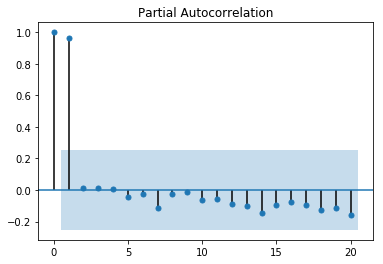

In [5]:
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(dfalmoststable.total_merged_gene)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
_ = plot_acf(dfalmoststable.total_merged_gene,lags=20)
_ = plot_pacf(dfalmoststable.total_merged_gene,lags=20)

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

## Positioning to a "plateau", around 2018-10 - 2019-03

data
2018-10-08    24126889
2018-10-14    24163749
2018-10-21    24248214
2018-10-28    24271746
2018-11-04    24299405
2018-11-11    24331239
2018-11-18    24366602
2018-11-26    24395498
2018-12-02    24422441
2018-12-09    24502789
2018-12-16    24541807
2018-12-23    24585841
2019-01-06    24706695
2019-01-13    24687183
2019-01-27    24765910
2019-02-03    24882719
2019-02-10    24904167
2019-02-19    24983644
2019-02-24    24998045
2019-03-03    24986799
2019-03-10    25055177
2019-03-18    25193801
Name: total_merged_gene, dtype: int64


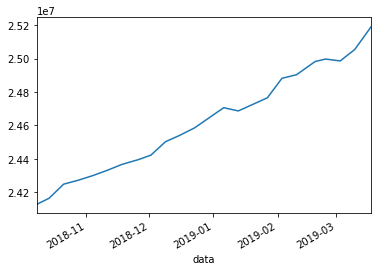

In [6]:
df.total_merged_gene[38:-6].plot()
dfzoom = df[38:-6]
print(dfzoom.total_merged_gene)

adf: -1.098465487667529
critical_values: {'5%': -3.1549724074074077, '1%': -4.137829282407408, '10%': -2.7144769444444443}


/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1357: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


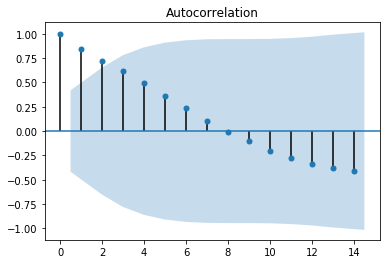

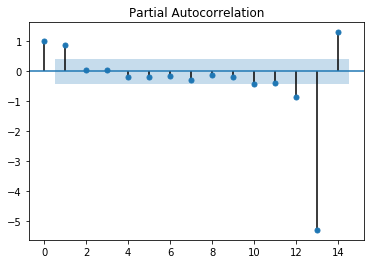

In [7]:
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(dfzoom.total_merged_gene)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
_ = plot_acf(dfzoom.total_merged_gene)
_ = plot_pacf(dfzoom.total_merged_gene)

ACF shows a high number of lags with strong positive & significant auto-correlations (there is a trend "going up", number of genes at t strongly depends on #genes at t-1 and it increases). https://people.duke.edu/~rnau/411arim2.htm

AD Fuller test show test statistic 1.20 is greater than all critical values, so we cannot reject the hypothesis that the time series is not stationary (it is not stationary since there's a trend), there's a "unit root test"


adf: -2.49621036831878
critical_values: {'5%': -3.1271488757396453, '1%': -4.068853732362312, '10%': -2.7017297633136095}


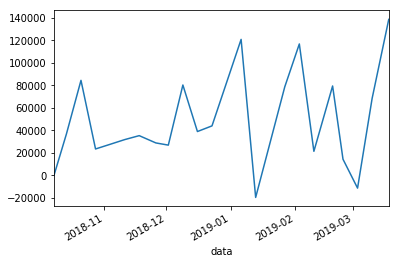

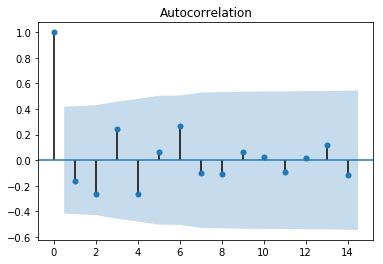

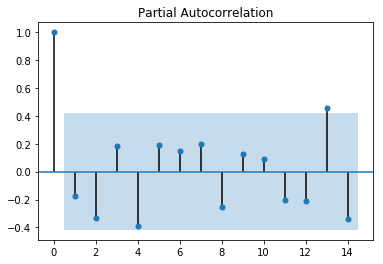

In [8]:
diff = dfzoom.total_merged_gene.diff(periods=1).fillna(0)
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(diff)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
diff.plot()
_ = plot_acf(diff)
_ = plot_pacf(diff)

adf: -11.183039537628183
critical_values: {'5%': -3.1549724074074077, '1%': -4.137829282407408, '10%': -2.7144769444444443}


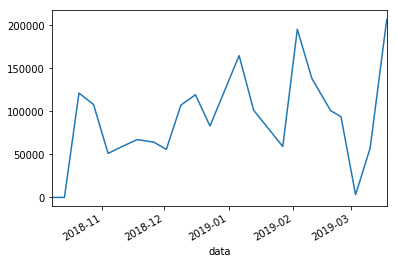

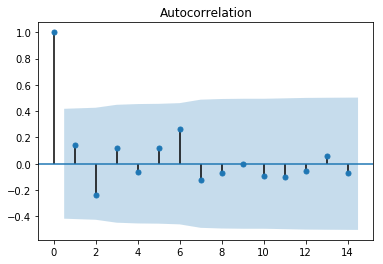

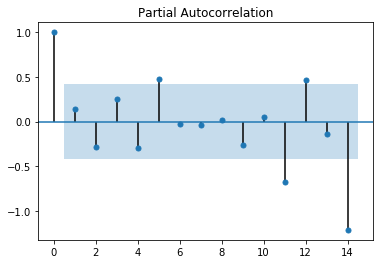

In [9]:
diff = dfzoom.total_merged_gene.diff(periods=2).fillna(0)
adf,pvalue,usedlag,nobs,critical_values,_ = adfuller(diff)
print("adf: %s"% adf)
print("critical_values: %s" % critical_values)
diff.plot()
_ = plot_acf(diff)
_ = plot_pacf(diff)

https://otexts.com/fpp2/non-seasonal-arima.html
https://machinelearningmastery.com/time-series-data-stationary-python/

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.total_merged_gene   No. Observations:                   21
Model:                  ARIMA(1, 1, 0)   Log Likelihood                -252.321
Method:                        css-mle   S.D. of innovations          39934.997
Date:                 Mon, 29 Apr 2019   AIC                            510.643
Time:                         17:15:29   BIC                            513.776
Sample:                              1   HQIC                           511.323
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.024e+04   7144.023      7.033      0.000    3.62e+04    6.42e+04
ar.L1.D.total_merged_gene    -0.2355      0.235     -1.002      0.329      -0.

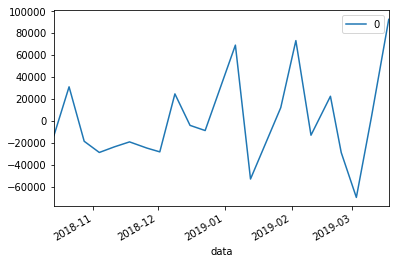

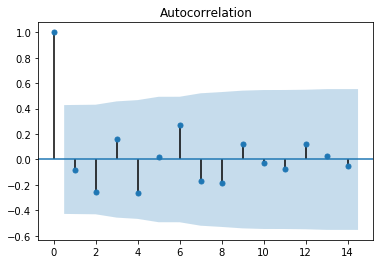

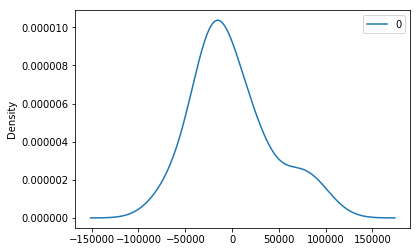

                  0
count     21.000000
mean    -294.944535
std    40926.147691
min   -69929.469649
25%   -24850.192529
50%   -13114.838254
75%    22453.342957
max    92653.983605


In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dfzoom.total_merged_gene,order=(1,1,0))
results = model.fit(disp=1)
print(results.summary())
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
_ = plot_acf(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Predict

Next release, there should be 25223225.650085732 documents +/- 39934.9971255423 ((or something between 25144954.49399696 and 25301496.806174506)
The reality: 29947669, is it ok ? False


/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:564: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


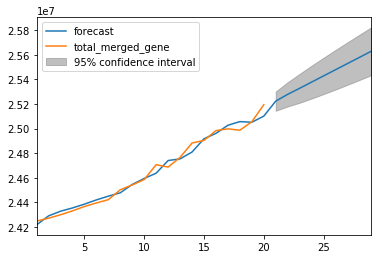

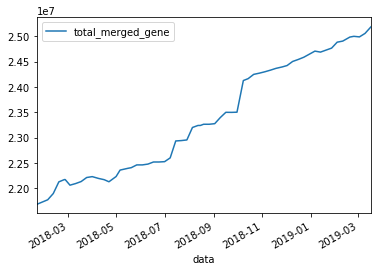

In [11]:
from sklearn.metrics import mean_squared_error
#print(dfzoom.index)
_ = results.plot_predict(start="2018-10-21",end=30)
dfalmoststable[['total_merged_gene']].plot()
#preds = results.predict(start="2018-10-21",end=30)
#print(results.predict(start="2018-10-21",end=30))
forecast,stderr,conf_int = results.forecast()
print("Next release, there should be %s documents +/- %s ((or something between %s and %s)" % (forecast[0],stderr[0],conf_int[0][0],conf_int[0][1]))
actual = df.total_merged_gene["2019-03-21"]
print("The reality: %s, is it ok ? %s" % (actual, actual >= conf_int[0][0] and actual <= conf_int[0][0]))



## Exog

data
2018-01-21          0
2018-02-04          0
2018-02-11          0
2018-02-18          0
2018-02-25          0
2018-02-26          0
2018-03-04          0
2018-03-11          0
2018-03-18          0
2018-03-25          0
2018-04-01          0
2018-04-09          0
2018-04-16          0
2018-04-22          0
2018-05-01          0
2018-05-06          0
2018-05-16          0
2018-05-20          0
2018-05-27          0
2018-06-03          0
2018-06-10          0
2018-06-17          0
2018-06-24          0
2018-07-01          0
2018-07-08          0
2018-07-15          0
2018-07-22          0
2018-07-29          0
2018-08-05          0
2018-08-12          0
               ...   
2018-08-26          0
2018-09-02          0
2018-09-09          0
2018-09-16          0
2018-09-23          0
2018-09-30          0
2018-10-08          0
2018-10-14          0
2018-10-21          0
2018-10-28          0
2018-11-04          0
2018-11-11          0
2018-11-18          0
2018-11-26          0
2018-

/opt/slelong/venvjpn/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


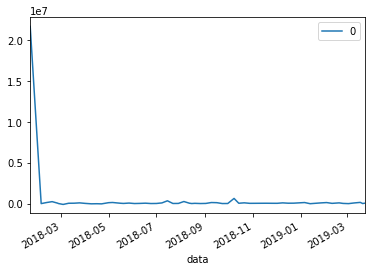

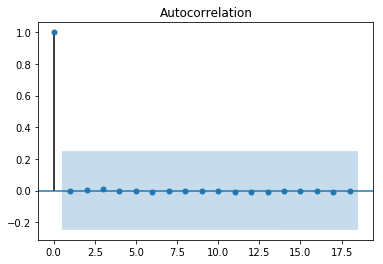

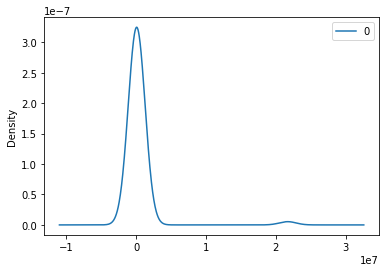

                  0
count  6.200000e+01
mean   4.051837e+05
std    2.748830e+06
min   -1.102940e+05
25%    6.092963e+03
50%    3.285895e+04
75%    7.970397e+04
max    2.168611e+07


In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#ARIMA?
print(df.total_ensembl_other_gene[:-4])
model = SARIMAX(df.total_merged_gene[:-4],order=(1,1,0),exog=df.total_ensembl_other_gene[:-4],enforce_stationarity=True)
results = model.fit(disp=1)
print(results.summary())
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
_ = plot_acf(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Predict

predict 29947461.388199512
The reality: 29947669
predict 29947672.908975
The reality: 29990646


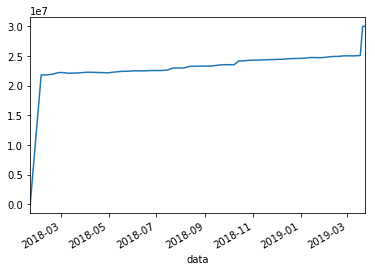

In [13]:
from sklearn.metrics import mean_squared_error
#print(dfzoom.index)
#_ = results.plot_predict(start="2018-10-21",end="2019-03-31",exog=df.total_ensembl_other_gene)
#dfalmoststable[['total_merged_gene']].plot()
#preds = results.predict(start="2018-10-21",end=30)
results.predict().plot()
print("predict %s" % results.predict()["2019-03-21"])
actual = df.total_merged_gene["2019-03-21"]
print("The reality: %s" % actual)
actual = df.total_merged_gene["2019-03-24"]
print("predict %s" % results.predict()["2019-03-24"])
print("The reality: %s" % actual)

